In [ ]:
# Creates a playlist of best recommended tracks per track in a playlist

# install Spotipy first
#!pip install Spotipy

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid =' ' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = ' ' # Client Secret; copy this from your app
username = 'smyrbdr' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://developer.spotify.com/dashboard/applications/f0637eedb19447a295f755638eb6de12'


client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [2]:
#Create a dataframe of your playlist including tracks' names and audio features
import pandas as pd

sourcePlaylistID = '53JCW4rDOwPtEmaWDgK4hn'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    for track in audio_features:
        features.append(track)
        
playlist_df = pd.DataFrame(features, index = track_names)

In [3]:
playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Beni Sen İnandır,0.825,0.400,0,-12.626,1,0.0456,0.490,0.000000,0.0981,0.838,106.000,audio_features,1rY4UYyZ3PcuYgWIddkcnL,spotify:track:1rY4UYyZ3PcuYgWIddkcnL,https://api.spotify.com/v1/tracks/1rY4UYyZ3Pcu...,https://api.spotify.com/v1/audio-analysis/1rY4...,224717,4
Kendime Yalan Söyledim,0.690,0.731,11,-5.770,0,0.0317,0.210,0.000000,0.0611,0.580,126.992,audio_features,5hYb9RIvqvk8J6mjMNL4pc,spotify:track:5hYb9RIvqvk8J6mjMNL4pc,https://api.spotify.com/v1/tracks/5hYb9RIvqvk8...,https://api.spotify.com/v1/audio-analysis/5hYb...,267080,4
Ve Ben,0.399,0.557,8,-6.203,0,0.0406,0.595,0.000002,0.1450,0.284,175.944,audio_features,7GT8FbMFCvo0rcd9i4yeCO,spotify:track:7GT8FbMFCvo0rcd9i4yeCO,https://api.spotify.com/v1/tracks/7GT8FbMFCvo0...,https://api.spotify.com/v1/audio-analysis/7GT8...,245195,4
Ölsem Yeridir,0.604,0.519,2,-6.501,0,0.0322,0.372,0.097200,0.0711,0.108,139.992,audio_features,7zn6VQuPR6aCLPRcZAA89R,spotify:track:7zn6VQuPR6aCLPRcZAA89R,https://api.spotify.com/v1/tracks/7zn6VQuPR6aC...,https://api.spotify.com/v1/audio-analysis/7zn6...,232133,4
Yokluğunda,0.524,0.487,9,-9.851,0,0.0365,0.561,0.000001,0.1710,0.183,139.969,audio_features,65lvjeOHd1ZDJKtRpB0c57,spotify:track:65lvjeOHd1ZDJKtRpB0c57,https://api.spotify.com/v1/tracks/65lvjeOHd1ZD...,https://api.spotify.com/v1/audio-analysis/65lv...,250961,4


In [4]:
playlist_df=playlist_df[["id", "acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
Beni Sen İnandır,1rY4UYyZ3PcuYgWIddkcnL,0.490,0.825,224717,0.400,0.000000,0,0.0981,-12.626,1,0.0456,106.000,0.838
Kendime Yalan Söyledim,5hYb9RIvqvk8J6mjMNL4pc,0.210,0.690,267080,0.731,0.000000,11,0.0611,-5.770,0,0.0317,126.992,0.580
Ve Ben,7GT8FbMFCvo0rcd9i4yeCO,0.595,0.399,245195,0.557,0.000002,8,0.1450,-6.203,0,0.0406,175.944,0.284
Ölsem Yeridir,7zn6VQuPR6aCLPRcZAA89R,0.372,0.604,232133,0.519,0.097200,2,0.0711,-6.501,0,0.0322,139.992,0.108
Yokluğunda,65lvjeOHd1ZDJKtRpB0c57,0.561,0.524,250961,0.487,0.000001,9,0.1710,-9.851,0,0.0365,139.969,0.183


In [10]:
playlist_df.shape

(25, 13)

In [11]:
## Change the below info for each playlist manually to get better results
# Give ratings to your tracks with respect to their playlist relevances
# Rate them from 1-5, give higher ratings to those tracks which you think best chracterizes your playlist
# If you order your playlist by relevance while creating it, this step will become easier
# So now, we will deal with a classification task
import numpy as np
playlist_df['ratings']=[5, 4, 5, 5, 4, 5, 5, 3, 5, 4, 2, 3, 5, 4, 5, 5, 4, 3, 5, 3, 4, 3, 3, 2, 2]
playlist_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,ratings
Beni Sen İnandır,1rY4UYyZ3PcuYgWIddkcnL,0.490,0.825,224717,0.400,0.000000,0,0.0981,-12.626,1,0.0456,106.000,0.838,5
Kendime Yalan Söyledim,5hYb9RIvqvk8J6mjMNL4pc,0.210,0.690,267080,0.731,0.000000,11,0.0611,-5.770,0,0.0317,126.992,0.580,4
Ve Ben,7GT8FbMFCvo0rcd9i4yeCO,0.595,0.399,245195,0.557,0.000002,8,0.1450,-6.203,0,0.0406,175.944,0.284,5
Ölsem Yeridir,7zn6VQuPR6aCLPRcZAA89R,0.372,0.604,232133,0.519,0.097200,2,0.0711,-6.501,0,0.0322,139.992,0.108,5
Yokluğunda,65lvjeOHd1ZDJKtRpB0c57,0.561,0.524,250961,0.487,0.000001,9,0.1710,-9.851,0,0.0365,139.969,0.183,4


In [17]:
!pip install PyForest

  Created wheel for PyForest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14607 sha256=5e0a4a414c1c63314ab1bc11ad4ec3101fd3a74c9c502717d97c1a95f67cb93f
  Stored in directory: c:\users\sumeyra.bedir\appdata\local\pip\cache\wheels\d5\1a\3e\6193fe1c56168f5df4aef57d8411033ba4611881135d495727
Successfully built PyForest


In [20]:
from pyforest import *

In [21]:
lazy_imports()

['import fastai',
 'from sklearn.linear_model import ElasticNet',
 'from scipy import stats',
 'import cv2',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import keras',
 'import seaborn as sns',
 'from scipy import signal as sg',
 'import imutils',
 'from sklearn.preprocessing import LabelEncoder',
 'import plotly.express as px',
 'from fbprophet import Prophet',
 'from sklearn.preprocessing import PolynomialFeatures',
 'import tqdm',
 'from sklearn.ensemble import GradientBoostingClassifier',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import matplotlib.pyplot as plt',
 'from sklearn.model_selection import train_test_split',
 'import bokeh',
 'from sklearn.model_selection import cross_val_score',
 'from sklearn import svm',
 'from xlrd import open_workbook',
 'from sklearn.preprocessing import OneHotEncoder',
 'import os',
 'import numpy as np',
 'import pydot',
 'from openpyxl import load_workbook',
 'import fbprophet',
 'from sklearn.model_selection impo

In [23]:
# Analyze feature importances
#from sklearn.ensemble.forest import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['id', 'ratings'], axis=1)
y_train = playlist_df['ratings']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=12) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))


Feature ranking:
1. acousticness 0.152415 
2. danceability 0.148479 
3. duration_ms 0.144127 
4. energy 0.127593 
5. instrumentalness 0.098641 
6. key 0.076889 
7. liveness 0.070520 
8. loudness 0.061047 
9. mode 0.043294 
10. speechiness 0.038584 
11. tempo 0.029676 
12. valence 0.008736 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

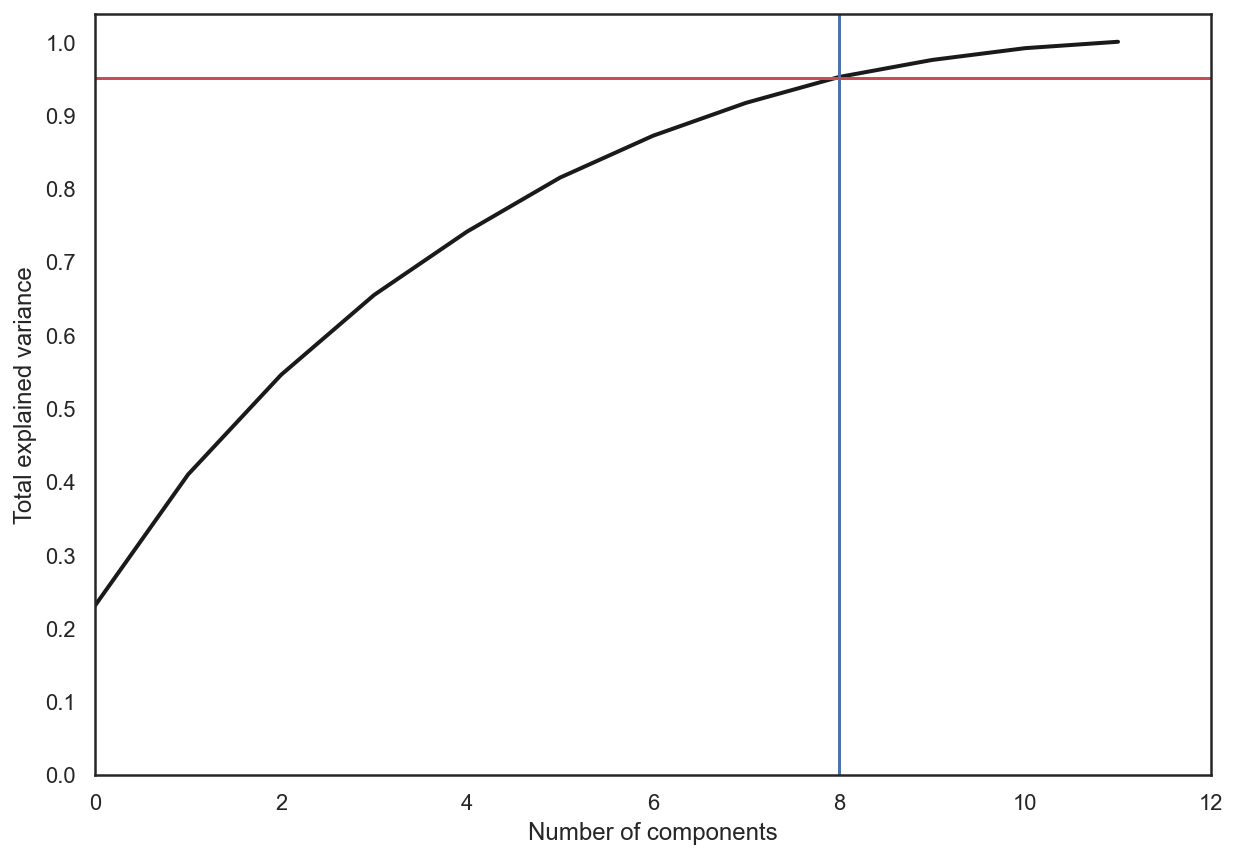

In [25]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)

pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

In [26]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)

In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [28]:
# Initialize the set of parameters for exhaustive search and fit 
parameters = {'max_features': [4, 7, 8], 'min_samples_leaf': [1, 3, 5], 'max_depth': [3,5]}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1, oob_score=True)
gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, cv=skf, verbose=1)
gcv1.fit(X_pca, y_train)
gcv1.best_estimator_, gcv1.best_score_

<IPython.core.display.Javascript object>

Fitting 5 folds for each of 18 candidates, totalling 90 fits


(RandomForestClassifier(max_depth=3, max_features=4, min_samples_leaf=5,
                        n_jobs=-1, oob_score=True, random_state=42),
 0.44000000000000006)

Don't expect high cross-val scores! Our dataset is way too small...
For my case, PCA + rfc seems to perform better than worst..

In [29]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

rec_tracks = []
for i in playlist_df['id'].values.tolist():
    rec_tracks += sp.recommendations(seed_tracks=[i], limit=int(len(playlist_df)/5))['tracks'];

rec_track_ids = []
rec_track_names = []
for i in rec_tracks:
    rec_track_ids.append(i['id'])
    rec_track_names.append(i['name'])

rec_features = []
for i in range(0,len(rec_track_ids)):
    rec_audio_features = sp.audio_features(rec_track_ids[i])
    for track in rec_audio_features:
        rec_features.append(track)
        
rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
rec_playlist_df.head()

<IPython.core.display.Javascript object>

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
3yPirH9Ix021C2MJjDgalE,0.263,0.301,5,-12.193,1,0.0304,0.8240,0.009350,0.0968,0.291,110.281,audio_features,3yPirH9Ix021C2MJjDgalE,spotify:track:3yPirH9Ix021C2MJjDgalE,https://api.spotify.com/v1/tracks/3yPirH9Ix021...,https://api.spotify.com/v1/audio-analysis/3yPi...,276389,4
6dZdPxVIlkKBDjcKbVM7zy,0.310,0.657,10,-7.955,0,0.1410,0.1380,0.000000,0.2080,0.408,168.271,audio_features,6dZdPxVIlkKBDjcKbVM7zy,spotify:track:6dZdPxVIlkKBDjcKbVM7zy,https://api.spotify.com/v1/tracks/6dZdPxVIlkKB...,https://api.spotify.com/v1/audio-analysis/6dZd...,272600,3
5h3B2E7tSVOSkvfwp5JxhX,0.734,0.443,7,-10.873,1,0.0270,0.6570,0.000001,0.2510,0.552,118.021,audio_features,5h3B2E7tSVOSkvfwp5JxhX,spotify:track:5h3B2E7tSVOSkvfwp5JxhX,https://api.spotify.com/v1/tracks/5h3B2E7tSVOS...,https://api.spotify.com/v1/audio-analysis/5h3B...,216782,3
6b0iQwJFAjQz8bwJbUIUQb,0.635,0.660,9,-4.558,1,0.0711,0.0825,0.000000,0.0779,0.660,136.017,audio_features,6b0iQwJFAjQz8bwJbUIUQb,spotify:track:6b0iQwJFAjQz8bwJbUIUQb,https://api.spotify.com/v1/tracks/6b0iQwJFAjQz...,https://api.spotify.com/v1/audio-analysis/6b0i...,250440,4
5b3SzOsJdsDLYYAcWFS0Ti,0.638,0.739,4,-9.330,0,0.0343,0.0189,0.000058,0.0674,0.911,137.959,audio_features,5b3SzOsJdsDLYYAcWFS0Ti,spotify:track:5b3SzOsJdsDLYYAcWFS0Ti,https://api.spotify.com/v1/tracks/5b3SzOsJdsDL...,https://api.spotify.com/v1/audio-analysis/5b3S...,260853,4


In [30]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [31]:
# Make predictions
gcv1.best_estimator_.fit(X_pca, y_train)
rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
y_pred_class = gcv1.best_estimator_.predict(rec_playlist_df_pca)

In [36]:
rec_playlist_df['ratings']=y_pred_class
rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
rec_playlist_df = rec_playlist_df.reset_index()

# Pick the top ranking tracks to add your new playlist 9, 10 will work
recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=5]['index'].values.tolist()


In [37]:
# Check what is about to happen :)
len(rec_tracks), rec_playlist_df.shape, len(recs_to_add)

(125, (125, 15), 89)

In [34]:
# Create a new playlist for tracks to add - you may also add these tracks to your source playlist and proceed
playlist_recs = sp.user_playlist_create(username, 
                                        name='Better Recommended Songs for Playlist {}'.format(sourcePlaylist['name']))


In [38]:
# Add tracks to the new playlist
sp.user_playlist_add_tracks(username, playlist_recs['id'], recs_to_add);

In [29]:
# This performed really well for my case, and I am pretty satisfied with the resulting playlist -more than the default recommendations